# BEST CITY TO ALLOCATE A GAMING COMPANY

## Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import math
import os
from dotenv import load_dotenv

from pymongo import MongoClient

import geopandas as gpd
from geopy.distance import distance
from geopy.distance import geodesic 
from shapely.geometry import Point
from geopy.distance import great_circle
from descartes import PolygonPatch

import matplotlib.pyplot as plt
%matplotlib inline

from cartoframes.viz import Map, Layer
from cartoframes.viz.helpers import size_continuous_layer
from cartoframes.viz.widgets import histogram_widget

import folium
from folium import plugins
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## MongoDB - Companies Data

In [2]:
#Importing companies.json from mongodb.
client = MongoClient("mongodb://localhost/companies")
db = client.get_database()

Importing companies data from MongoDB.

Filtering by gaming/video companies and the employees > 10 prs.

In [3]:
query={"$and":[{"category_code":{"$eq":"games_video"}},{"number_of_employees":{"$gte":10}}]}
list_companies=list(db['companies'].find((query),{"category_code":1,'number_of_employees':1,'name':1,"total_money_raised":1,"offices":1,'_id':0}).sort("number_of_employees",-1))

In [4]:
#Converting the info into 'pandas'
df = pd.DataFrame(list_companies)

In [5]:
#Removing duplicates.
df = df.drop_duplicates(subset='name', keep='first')

In [6]:
#Removing the NAN values from offices column.
df.dropna(subset=['offices'], inplace=True)

In [7]:
#Removing the lists from offices column 
df = df.explode('offices')

In [8]:
#Expand information from offices column.
exapand_office_column = df[["offices"]].apply(lambda r: r.offices, result_type="expand", axis=1)
data_expanded = pd.concat([df,exapand_office_column], axis=1)

In [9]:
#Removing old column with lists.
df_companies = data_expanded.drop(columns=["offices"])

In [10]:
#Removing the NAN long and latt columns.
df_companies.dropna(subset=['latitude'], inplace=True)
df_companies.dropna(subset=['longitude'], inplace=True)

## TOP 5 CITIES WITH MORE GAMING COMPANIES

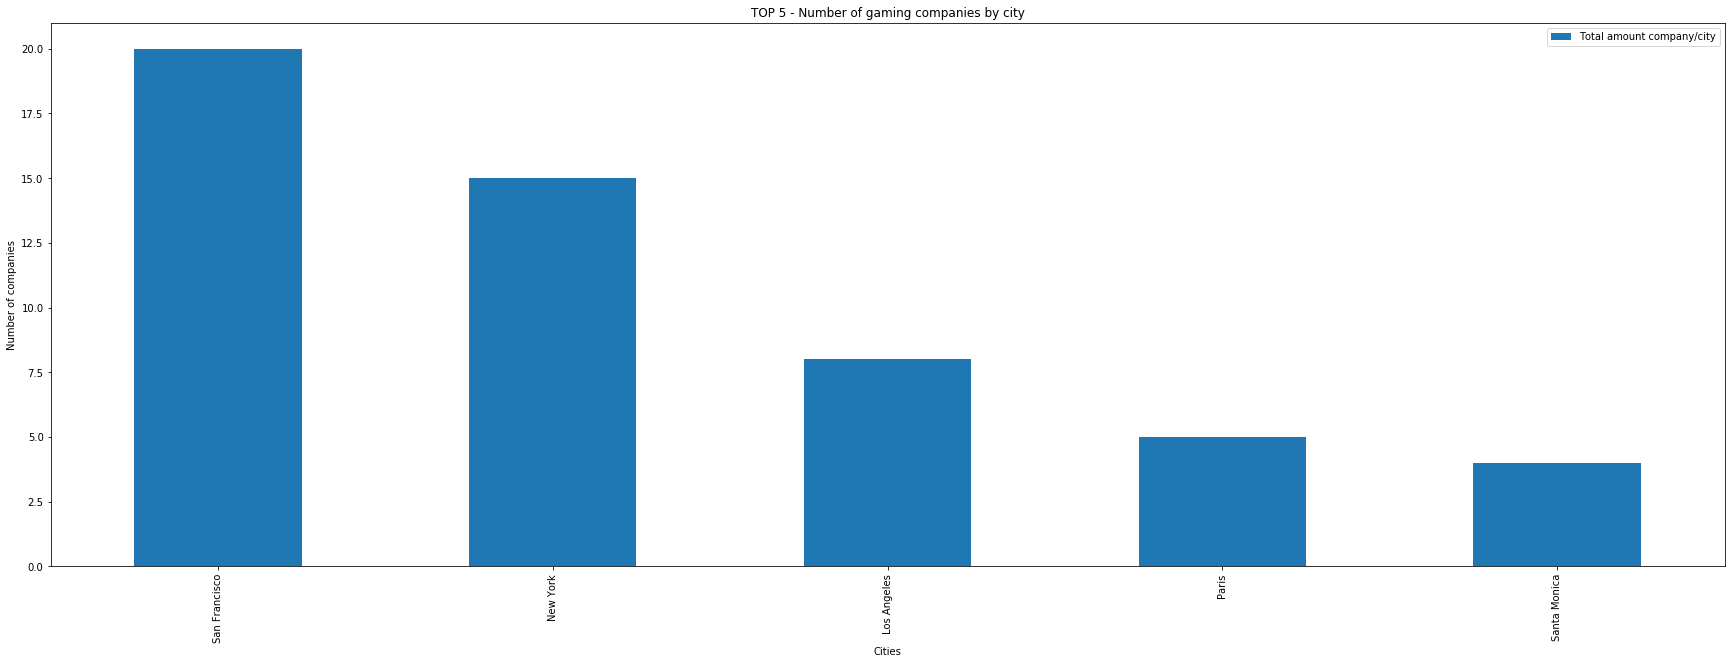

In [11]:
#TOP5 cities with more companies with 'category code' = 'video_games'

graph_df=df_companies[['city','name']]
graphic= graph_df.groupby('city').count().sort_values('name',ascending = False).head()

graphic.plot.bar(figsize=(30,10));
plt.legend(["Total amount company/city"])
plt.title("TOP 5 - Number of gaming companies by city")
plt.xlabel("Cities")
plt.ylabel("Number of companies");

# Comparing Km for Companies & Airports

### SAN FRANCISCO

1- COMPANIES

In [12]:
def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }
sf = geocode("San Francisco, CA, USA")
sf

{'type': 'Point', 'coordinates': [-122.40438, 37.66873]}

In [13]:
def withGeoQuery(location,maxDistance=15000,minDistance=0,field="location"):
    return {
       field: {
         "$near": {
           "$geometry": location if type(location)==dict else geocode(location),
           "$maxDistance": maxDistance,
           "$minDistance": minDistance
         }
       }
    }
query = withGeoQuery(sf)

In [14]:
#There are 18 gaming companies - 15 Km.
comp_sf = list(db["cleancompanies"].find(query))
print(len(comp_sf),'companies')

18 companies


2- AIRPORT

In [15]:
load_dotenv()
token = os.getenv("TOKEN_GOOGLE")
address='San Francisco Airport'
data = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={token}").json()
lat_sf_airport=(data['results'][0]['geometry']['location']['lat'])
long_sf_airport=(data['results'][0]['geometry']['location']['lng'])
print('Lat. = ',lat_sf_airport)
print('Long = ',long_sf_airport)

Python-dotenv could not parse statement starting at line 2


Lat. =  37.6213129
Long =  -122.3789554


In [16]:
#KM between airport & city

sf = (37.66873,-122.40438) 
airport_sf = (37.6213129,-122.3789554) 
print('Km from San Francisco to SF Airport =', great_circle(sf, airport_sf).km,'km')

Km from San Francisco to SF Airport = 5.728065177954947 km


### NEW YORK

1- COMPANIES 

In [17]:
def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }
ny = geocode("New York, USA")
ny

{'type': 'Point', 'coordinates': [-73.9586, 40.68908]}

In [18]:
def withGeoQuery(location,maxDistance=15000,minDistance=0,field="location"):
    return {
       field: {
         "$near": {
           "$geometry": location if type(location)==dict else geocode(location),
           "$maxDistance": maxDistance,
           "$minDistance": minDistance
         }
       }
    }
query = withGeoQuery(ny)

In [19]:
#There are 17 gaming companies - 15 Km.
comp_ny = list(db["cleancompanies"].find(query))
print(len(comp_ny),'companies')

17 companies


2- AIRPORT

In [20]:
load_dotenv()
token = os.getenv("TOKEN_GOOGLE")
address='New York KFC Airport'
data = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={token}").json()
lat_ny_airport=(data['results'][0]['geometry']['location']['lat'])
long_ny_airport=(data['results'][0]['geometry']['location']['lng'])
print('Lat. = ',lat_ny_airport)
print('Long = ',long_ny_airport)

Python-dotenv could not parse statement starting at line 2


Lat. =  40.6413111
Long =  -73.77813909999999


In [21]:
#KM between airport & city

ny = (40.68908,-73.9586) 
airport_ny = (40.6413111,-73.77813909999999) 
print('Km from NY to NY Airport =', great_circle(ny, airport_ny).km,'km')

Km from NY to NY Airport = 16.12113145961942 km


### LOS ANGELES

1- COMPANIES

In [22]:
def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }
la = geocode("Los Angeles")
la

{'type': 'Point', 'coordinates': [-118.29757, 34.04015]}

In [23]:
def withGeoQuery(location,maxDistance=15000,minDistance=0,field="location"):
    return {
       field: {
         "$near": {
           "$geometry": location if type(location)==dict else geocode(location),
           "$maxDistance": maxDistance,
           "$minDistance": minDistance
         }
       }
    }
query = withGeoQuery(la)

In [24]:
#There are 12 gaming companies - 15 Km.
comp_la = list(db["cleancompanies"].find(query))
print(len(comp_la),'companies')

12 companies


2- AIRPORT

In [25]:
load_dotenv()
token = os.getenv("TOKEN_GOOGLE")
address='Los Angeles Airport'
data = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={token}").json()
lat_la_airport=(data['results'][0]['geometry']['location']['lat'])
long_la_airport=(data['results'][0]['geometry']['location']['lng'])
print('Lat. = ',lat_la_airport)
print('Long = ',long_la_airport)

Python-dotenv could not parse statement starting at line 2


Lat. =  33.9415889
Long =  -118.40853


In [26]:
#KM between airport & city

la = (34.04015,-118.29757) 
airport_la = (33.9415889,-118.40853) 
print('Km from LA to LA Airport =', great_circle(la, airport_la).km,'km')

Km from LA to LA Airport = 14.992077104477458 km


### PARIS

1- COMPANIES

In [27]:
def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }
paris = geocode("Paris")
paris

{'type': 'Point', 'coordinates': [2.34293, 48.85717]}

In [28]:
def withGeoQuery(location,maxDistance=15000,minDistance=0,field="location"):
    return {
       field: {
         "$near": {
           "$geometry": location if type(location)==dict else geocode(location),
           "$maxDistance": maxDistance,
           "$minDistance": minDistance
         }
       }
    }
query = withGeoQuery(paris)

In [29]:
#There are 4 gaming companies - 15 Km.
comp_paris = list(db["cleancompanies"].find(query))
print(len(comp_paris),'companies')

4 companies


2- AIRPORT

In [30]:
load_dotenv()
token = os.getenv("TOKEN_GOOGLE")
address='Paris-Charles De Gaulle'
data = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={token}").json()
lat_paris_airport=(data['results'][0]['geometry']['location']['lat'])
long_paris_airport=(data['results'][0]['geometry']['location']['lng'])
print('Lat. = ',lat_paris_airport)
print('Long = ',long_paris_airport)

Python-dotenv could not parse statement starting at line 2


Lat. =  49.0096906
Long =  2.5479245


In [31]:
#KM between airport & city

paris = (48.85717,2.34293) 
airport_paris = (49.0096906,2.5479245) 
print('Km from Paris to Paris-Charles De Gaulle =', great_circle(paris, airport_paris).km,'km')

Km from Paris to Paris-Charles De Gaulle = 22.62430090103764 km


### SANTA MONICA

1- COMPANIES

In [32]:
def geocode(address):
    data = requests.get(f"https://geocode.xyz/{address}?json=1").json()
    return {
        "type":"Point",
        "coordinates":[float(data["longt"]),float(data["latt"])]
    }
sm = geocode("Santa Monica, CA, USA")
sm

{'type': 'Point', 'coordinates': [-118.48319, 34.02401]}

In [33]:
def withGeoQuery(location,maxDistance=15000,minDistance=0,field="location"):
    return {
       field: {
         "$near": {
           "$geometry": location if type(location)==dict else geocode(location),
           "$maxDistance": maxDistance,
           "$minDistance": minDistance
         }
       }
    }
query = withGeoQuery(sm)

In [34]:
#There are 4 gaming companies - 15 Km.
comp_sm = list(db["cleancompanies"].find(query))
print(len(comp_sm),'companies')

12 companies


2- AIRPORT

In [35]:
load_dotenv()
token = os.getenv("TOKEN_GOOGLE")
address='Santa Monica Airport'
data = requests.get(f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={token}").json()
lat_paris_airport=(data['results'][0]['geometry']['location']['lat'])
long_paris_airport=(data['results'][0]['geometry']['location']['lng'])
print('Lat. = ',lat_paris_airport)
print('Long. = ',long_paris_airport)

Python-dotenv could not parse statement starting at line 2


Lat. =  34.0178143
Long. =  -118.4473286


In [36]:
#KM between airport & city

sm = (34.02401,-118.48319) 
airport_sm = (34.0178143,-118.4473286) 
print('Km from Santa Monica to Santa Monica Airport =', great_circle(sm, airport_sm).km,'km')

Km from Santa Monica to Santa Monica Airport = 3.3761049677896473 km


### NEXT STEPS:

Santa Monica is the closest city to the airport and has a huge amount of gaming companies around, thus, this city will be further analyzed.

## Convertig DataFrame into GeoDataFrame

In [37]:
gdf = gpd.GeoDataFrame(df_companies, geometry=gpd.points_from_xy(df_companies.longitude, df_companies.latitude))

In [38]:
#Adding Airport on heatmap.
start_lat = 34.02401
start_lon = -118.48319
heat_m_sm = folium.Map(location=[start_lat, start_lon],tiles='cartodbpositron', zoom_start=15)
Marker([start_lat, start_lon], icon=folium.Icon(color='blue')).add_to(heat_m_sm)

In [39]:
#Printing companies on heatmap.
companies = gdf
companies_group = folium.FeatureGroup(name="Gaming Companies")
HeatMap(data=companies[['latitude', 'longitude']],radius=15).add_to(companies_group)
companies_group.add_to(heat_m_sm)

In [40]:
#ADDING AIRPORT COORDINATES
airport_long, airport_lat = -118.4459796197085, 34.01916328029149
heat_m_sm=heat_m_sm.add_child(Marker([airport_lat, airport_long], icon=folium.Icon(icon='plane',color='lightblue')))

In [54]:
#ADDING NURSERIES
load_dotenv()
token = os.getenv("TOKEN_GOOGLE")
location="34.02401,-118.48319"
site='university'
data=requests.get(f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={location}&radius=15000&type={site}&keyword=cruise&key={token}").json()


Python-dotenv could not parse statement starting at line 2


In [55]:
#Extracting the info of results column. Splitting the information in order to get lat and lng.
df_school=pd.DataFrame(data['results'])


exapand_school_column = df_school[["geometry"]].apply(lambda r: r.geometry, result_type="expand", axis=1)
data_expanded_school = pd.concat([df_school,exapand_school_column], axis=1)
exapand_loc_column = data_expanded_school[["location"]].apply(lambda r: r.location, result_type="expand", axis=1)
data_expanded_school_1 = pd.concat([data_expanded_school,exapand_loc_column], axis=1)
data_expanded_school_1

,geometry,icon,id,name,photos,place_id,plus_code,rating,reference,scope,types,user_ratings_total,vicinity,opening_hours,location,viewport,lat,lng
0,"{'location': {'lat': 34.0165568, 'lng': -118.4...",https://maps.gstatic.com/mapfiles/place_api/ic...,a275a24b6da95d70dc896c7ed72bff2b0c08d072,Santa Monica College,"[{'height': 833, 'html_attributions': ['<a hre...",ChIJj9kmJSS7woARdGiSfGFMI5c,"{'compound_code': '2G8H+JR Santa Monica, Calif...",4.3,ChIJj9kmJSS7woARdGiSfGFMI5c,GOOGLE,"[university, point_of_interest, establishment]",331,"1900 Pico Blvd, Santa Monica",NaN,"{'lat': 34.0165568, 'lng': -118.4703948}","{'northeast': {'lat': 34.02144849999998, 'lng'...",34.016557,-118.470395
1,"{'location': {'lat': 34.0042282, 'lng': -118.3...",https://maps.gstatic.com/mapfiles/place_api/ic...,ac0f510d8e6a4aba7ec0d78cc20f48a44dfb5aac,West Los Angeles College,"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJaedHyfa5woARvfX-J1IrdEc,"{'compound_code': '2J37+M4 Culver City, Califo...",3.1,ChIJaedHyfa5woARvfX-J1IrdEc,GOOGLE,"[university, point_of_interest, establishment]",152,"9000 Overland Ave, Culver City",{'open_now': True},"{'lat': 34.0042282, 'lng': -118.3871555}","{'northeast': {'lat': 34.00557362989272, 'lng'...",34.004228,-118.387156
2,"{'location': {'lat': 33.9566849, 'lng': -118.4...",https://maps.gstatic.com/mapfiles/place_api/ic...,aab3cd1148dfa9d5407efeb19bf0a1bd8f7a5d86,Otis College of Art and Design,"[{'height': 2592, 'html_attributions': ['<a hr...",ChIJiy3U3OmwwoARXUw6sBeWVZE,"{'compound_code': 'XH4M+M4 Los Angeles, Califo...",4.3,ChIJiy3U3OmwwoARXUw6sBeWVZE,GOOGLE,"[university, point_of_interest, establishment]",56,"9045 Lincoln Blvd, Los Angeles",NaN,"{'lat': 33.9566849, 'lng': -118.4171575}","{'northeast': {'lat': 33.95884805, 'lng': -118...",33.956685,-118.417158
3,"{'location': {'lat': 34.1520127, 'lng': -118.3...",https://maps.gstatic.com/mapfiles/place_api/ic...,9d22d0d1bbe3e9a51c6f08937e54b7505cc6959d,New York Film Academy | Los Angeles,"[{'height': 490, 'html_attributions': ['<a hre...",ChIJr6cVNbS_woARHzMMiXk9rds,"{'compound_code': '5M27+RR Burbank, California...",4.6,ChIJr6cVNbS_woARHzMMiXk9rds,GOOGLE,"[university, point_of_interest, establishment]",83,"3300 W Riverside Dr, Burbank",{'open_now': True},"{'lat': 34.1520127, 'lng': -118.3353948}","{'northeast': {'lat': 34.15322257989272, 'lng'...",34.152013,-118.335395
4,"{'location': {'lat': 34.1009837, 'lng': -118.3...",https://maps.gstatic.com/mapfiles/place_api/ic...,63741ec8116994420f79ae6d6cdde50a2a657b71,Southern California Health Institute,"[{'height': 319, 'html_attributions': ['<a hre...",ChIJxWUzZL2_woARdWupE6_FRXg,"{'compound_code': '4M2F+97 Los Angeles, Califo...",0.0,ChIJxWUzZL2_woARdWupE6_FRXg,GOOGLE,"[university, point_of_interest, establishment]",0,"1639 Vine St, Los Angeles",NaN,"{'lat': 34.1009837, 'lng': -118.3268649}","{'northeast': {'lat': 34.10233422989272, 'lng'...",34.100984,-118.326865
5,"{'location': {'lat': 34.068921, 'lng': -118.44...",https://maps.gstatic.com/mapfiles/place_api/ic...,4d56f16ad3d8976d49143fa4fdfffbc0a7ce8e39,"University of California, Los Angeles","[{'height': 3024, 'html_attributions': ['<a hr...",ChIJZQ9c8IW8woARN0gTXFiTqSU,"{'compound_code': '3H93+HW Los Angeles, Califo...",4.5,ChIJZQ9c8IW8woARN0gTXFiTqSU,GOOGLE,"[university, point_of_interest, establishment]",1646,Los Angeles,NaN,"{'lat': 34.068921, 'lng': -118.4451811}","{'northeast': {'lat': 34.0828575, 'lng': -118....",34.068921,-118.445181
6,"{'location': {'lat': 34.09769540000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,9c9313ee51d1a302774cbb70a1616c8ecef2b7cf,Emerson College Los Angeles Center,"[{'height': 2668, 'html_attributions': ['<a hr...",ChIJgY98A82_woARpsIIaqswmDA,"{'compound_code': '3MXJ+33 Los Angeles, Califo...",4.0,ChIJgY98A82_woARpsIIaqswmDA,GOOGLE,"[university, point_of_interest, establishment]",16,"5960 Sunset Blvd, Los Angeles",NaN,"{'lat': 34.09769540000001, 'lng': -118.3198129}","{'northeast': {'lat': 34.09922107989271,

In [53]:
#Converting Pandas to Geopandas.
gdf_school= gpd.GeoDataFrame(data_expanded_school_1, geometry=gpd.points_from_xy(data_expanded_school_1.lng, data_expanded_school_1.lat))

In [44]:
#Adding nurseries on map.
school = gdf_school[['lat', 'lng']]
school_group = folium.FeatureGroup(name="School")
school_group.add_child(MarkerCluster(locations=school[['lat', 'lng']]))
heat_m_sm=heat_m_sm.add_child(school_group)

In [45]:
#ADDING AMUSEMENT PARK!
load_dotenv()
token = os.getenv("TOKEN_GOOGLE")
location="34.02401,-118.48319"
site='amusement_park'
data=requests.get(f"https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={location}&radius=5000&type={site}&keyword=cruise&key={token}").json()

Python-dotenv could not parse statement starting at line 2


In [46]:
#Extracting the info of results column. Splitting the information in order to get lat and lng.
df_park=pd.DataFrame(data['results'])
exapand_park_column = df_park[["geometry"]].apply(lambda r: r.geometry, result_type="expand", axis=1)
data_expanded_park = pd.concat([df_park,exapand_park_column], axis=1)
exapand_loc_column = data_expanded_park[["location"]].apply(lambda r: r.location, result_type="expand", axis=1)
data_expanded_park_1 = pd.concat([data_expanded_park,exapand_loc_column], axis=1)
data_expanded_park_1

,geometry,icon,id,name,opening_hours,photos,place_id,plus_code,rating,reference,scope,types,user_ratings_total,vicinity,location,viewport,lat,lng
0,"{'location': {'lat': 34.008576, 'lng': -118.49...",https://maps.gstatic.com/mapfiles/place_api/ic...,46106265190691f9e91e1cd0bc95dab12cd2dffd,Pacific Park,{'open_now': True},"[{'height': 3036, 'html_attributions': ['<a hr...",ChIJdShDN_fAwoARlRtwHmyGais,"{'compound_code': '2G52+CQ Santa Monica, Calif...",4.6,ChIJdShDN_fAwoARlRtwHmyGais,GOOGLE,"[amusement_park, tourist_attraction, point_of_...",8772,"380 Santa Monica Pier, Santa Monica","{'lat': 34.008576, 'lng': -118.498101}","{'northeast': {'lat': 34.01014442989271, 'lng'...",34.008576,-118.498101


In [47]:
#Converting Pandas to Geopandas.
gdf_rest_geo = gpd.GeoDataFrame(data_expanded_park_1, geometry=gpd.points_from_xy(data_expanded_park_1.lng, data_expanded_park_1.lat))

In [48]:
#Adding amusement park on map.
park = gdf_rest_geo[['lat', 'lng']]
park_group = folium.FeatureGroup(name="Amusement Park")
park_group.add_child(MarkerCluster(locations=gdf_rest_geo[['lat', 'lng']]))
heat_m_sm.add_child(park_group)
folium.LayerControl(collapsed=False).add_to(heat_m_sm)

In [49]:
heat_m_sm

## CONCLUSION

As per collected information, Santa Monica seems to be a good city to allocate a gaming company, since it has an airport close to the city, near universities, near places to have fun with family or work colleagues and there are a lot of gaming companies around too, so, knowledge is guaranteed.